In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## HPL

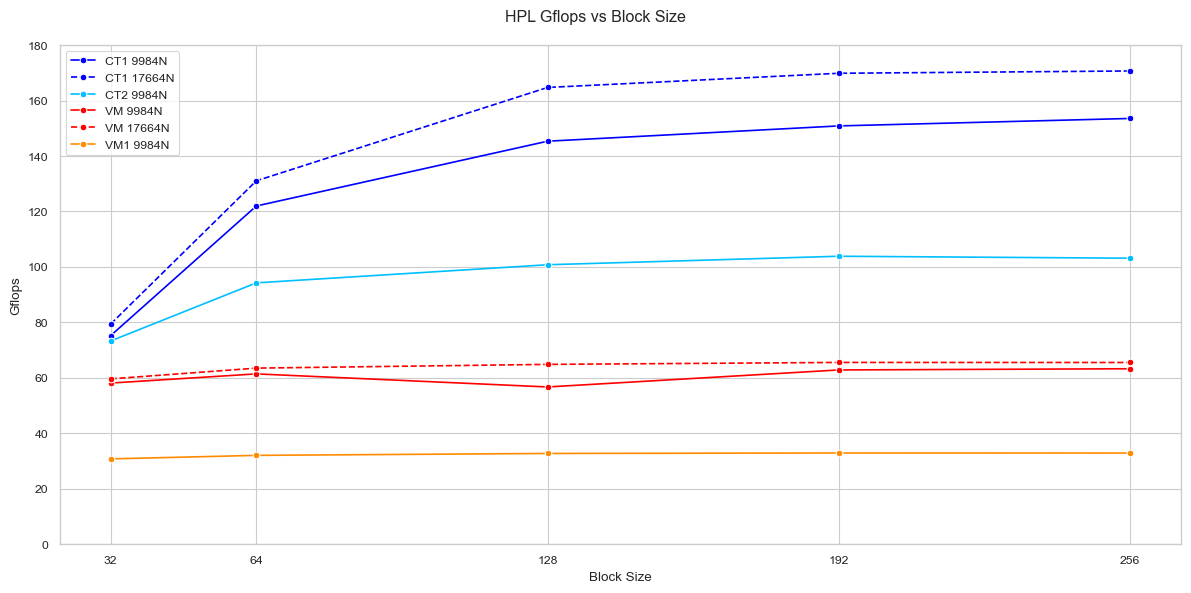

In [67]:
CT1_9984 = pd.read_csv('./avgs/hpl_CT1_9984N_avg.csv')
CT1_17664 = pd.read_csv('./avgs/hpl_CT1_17664N_avg.csv')
CT2_9984 = pd.read_csv('./avgs/hpl_CT2_9984N_avg.csv')
VM_9984 = pd.read_csv('./avgs/hpl_VM_M_9984N_avg.csv')
VM_17664 = pd.read_csv('./avgs/hpl_VM_M_17664N_avg.csv')
VM1_9984 = pd.read_csv('./avgs/hpl_VM1_9984N_avg.csv')

plt.figure(figsize=(12, 6))

ax1 = sns.lineplot(x='NB', y='Gflops', data=CT1_9984, label='CT1 9984N', marker='o', color='b')
sns.lineplot(x='NB', y='Gflops', data=CT1_17664, label='CT1 17664N', marker='o', color='b')
sns.lineplot(x='NB', y='Gflops', data=CT2_9984, label='CT2 9984N', marker='o', color='deepskyblue')
sns.lineplot(x='NB', y='Gflops', data=VM_9984, label='VM 9984N', marker='o', color='r')
sns.lineplot(x='NB', y='Gflops', data=VM_17664, label='VM 17664N', marker='o', color='r')
sns.lineplot(x='NB', y='Gflops', data=VM1_9984, label='VM1 9984N', marker='o', color='darkorange')

ax1.lines[1].set_linestyle("--")
ax1.lines[4].set_linestyle("--")

plt.ylim(0, 180)
plt.legend()
plt.xlabel('Block Size')
plt.ylabel('Gflops')
plt.xticks([32, 64, 128, 192, 256])


plt.suptitle('HPL Gflops vs Block Size')

plt.tight_layout()
plt.show()

## Iperf3

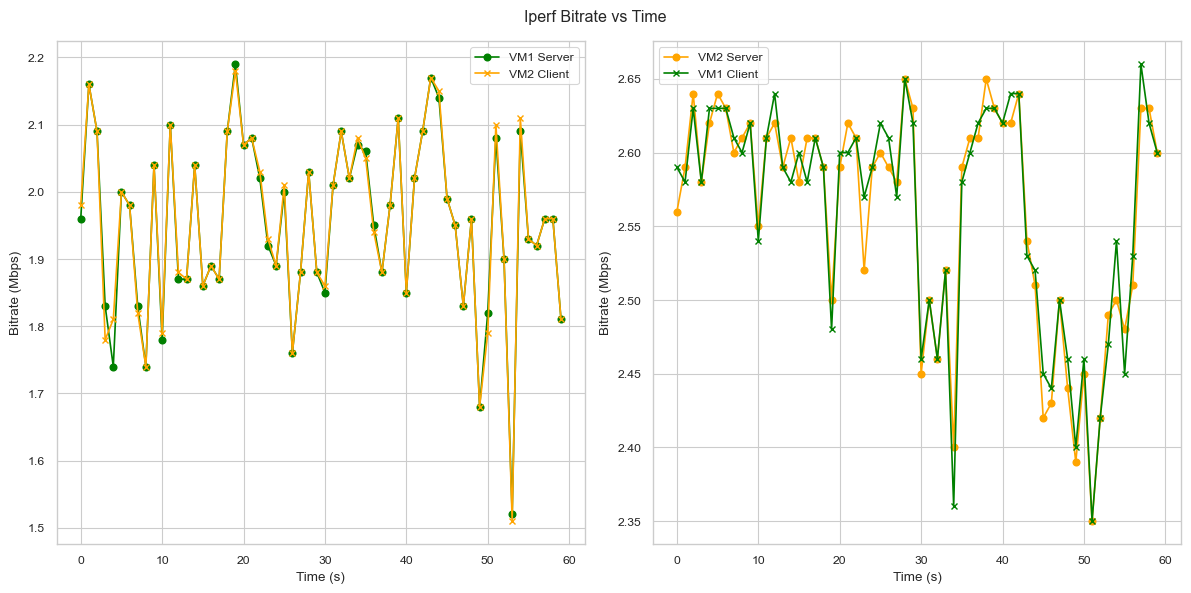

In [32]:
CT1_client = pd.read_csv('./avgs/iperf_CT1_client_avg.csv')
CT1_server = pd.read_csv('./avgs/iperf_CT1_server_avg.csv')
CT2_client = pd.read_csv('./avgs/iperf_CT2_client_avg.csv')
CT2_server = pd.read_csv('./avgs/iperf_CT2_server_avg.csv')

VM_client = pd.read_csv('./avgs/iperf_VM_M_client_avg.csv')
VM_server = pd.read_csv('./avgs/iperf_VM_M_server_avg.csv')
VM1_client = pd.read_csv('./avgs/iperf_VM1_client_avg.csv')
VM1_server = pd.read_csv('./avgs/iperf_VM1_server_avg.csv')

# Create the plot
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# axis[0].plot(CT1_server['second'], CT1_server['bitrate'], label='CT1 Server', color='blue', marker='o')
# axis[0].plot(CT2_client['second'], CT2_client['bitrate'], label='CT2 Client', color='red', marker='x')
axis[0].plot(VM_server['second'], VM_server['bitrate'], label='VM1 Server', color='green', marker='o')
axis[0].plot(VM1_client['second'], VM1_client['bitrate'], label='VM2 Client', color='orange', marker='x')
axis[0].set_xlabel('Time (s)')
axis[0].set_ylabel('Bitrate (Mbps)')
axis[0].legend()

# axis[1].plot(CT2_server['second'], CT2_server['bitrate'], label='CT2 Server', color='red', marker='o')
# axis[1].plot(CT1_client['second'], CT1_client['bitrate'], label='CT1 Client', color='blue', marker='x')
axis[1].plot(VM1_server['second'], VM1_server['bitrate'], label='VM2 Server', color='orange', marker='o')
axis[1].plot(VM_client['second'], VM_client['bitrate'], label='VM1 Client', color='green', marker='x')
axis[1].set_xlabel('Time (s)')
axis[1].set_ylabel('Bitrate (Mbps)')
axis[1].legend()

plt.suptitle('Iperf Bitrate vs Time')

# Display the plot
plt.tight_layout()
plt.show()

## Iozone

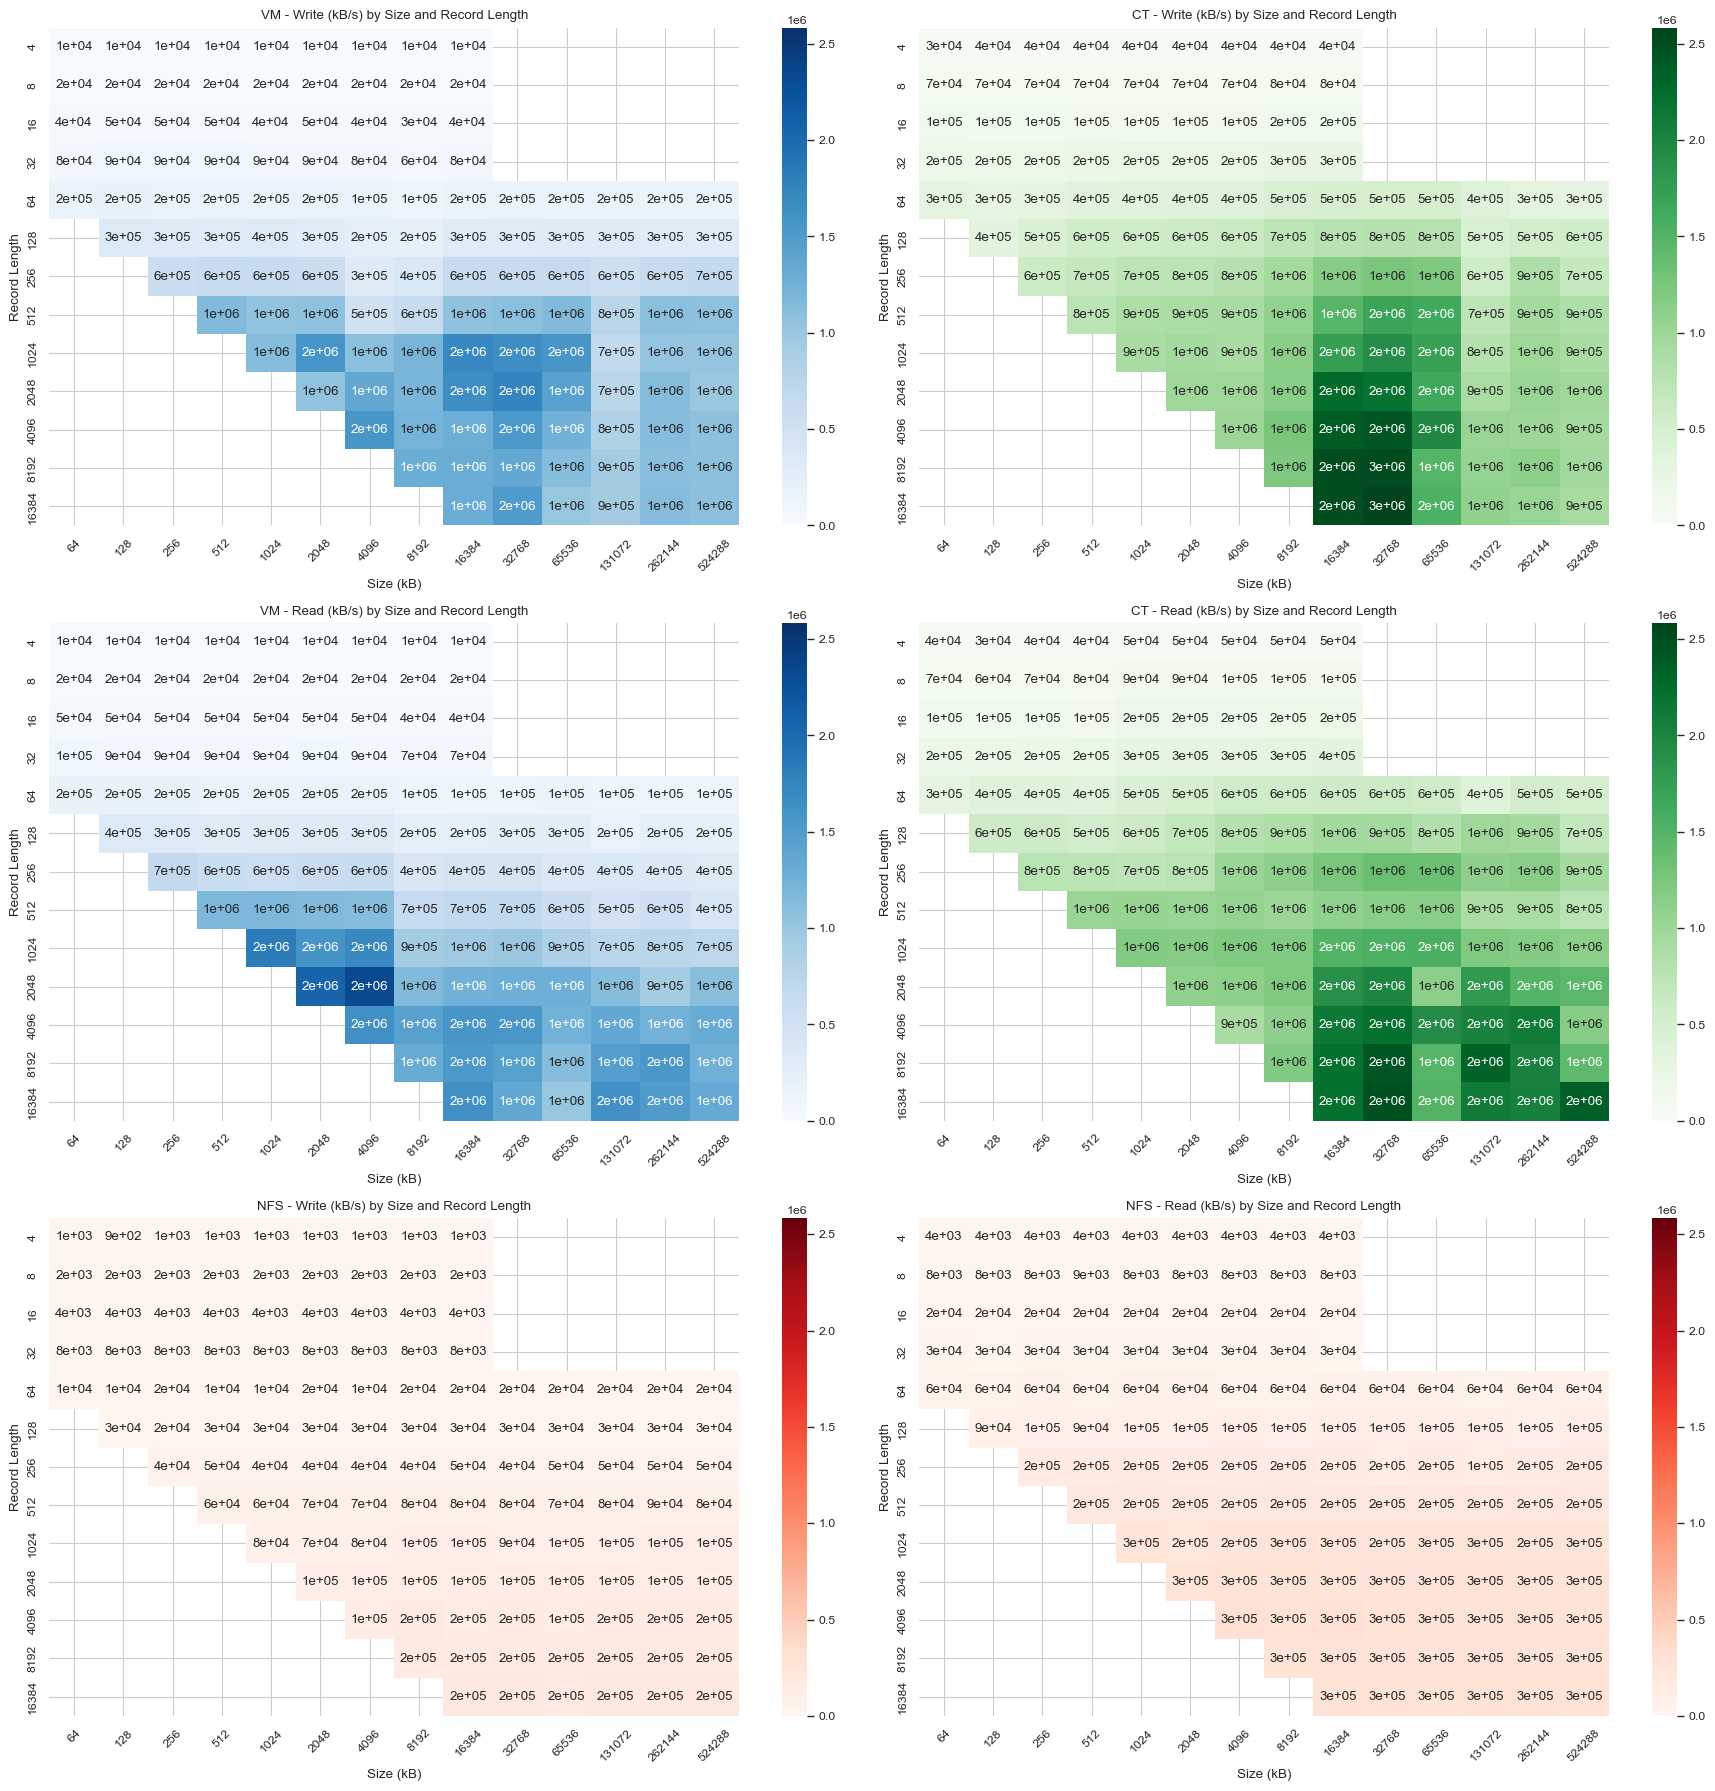

In [23]:
CT = pd.read_csv('./avgs/iozone_CT_avg.csv')
VM = pd.read_csv('./avgs/iozone_VM_avg.csv')
NFS = pd.read_csv('./avgs/iozone_NFS_avg.csv')

write_VM = VM.pivot(index="Record Length", columns="Size (kB)", values="Write (kB/s)")
write_CT = CT.pivot(index="Record Length", columns="Size (kB)", values="Write (kB/s)")
write_NFS = NFS.pivot(index="Record Length", columns="Size (kB)", values="Write (kB/s)")

read_VM = VM.pivot(index="Record Length", columns="Size (kB)", values="Read (kB/s)")
read_CT = CT.pivot(index="Record Length", columns="Size (kB)", values="Read (kB/s)")
read_NFS = NFS.pivot(index="Record Length", columns="Size (kB)", values="Read (kB/s)")

vmax = CT[["Write (kB/s)", "Read (kB/s)"]].max().max()

# Create the heatmap using Seaborn
figure, axis = plt.subplots(3, 2, figsize=(18, 18))

sns.heatmap(write_VM, ax=axis[0,0], vmin=0, vmax=vmax, annot=True, fmt=".1g", cmap="Blues")
axis[0,0].set_title("VM - Write (kB/s) by Size and Record Length")
axis[0,0].set_xlabel("Size (kB)")
axis[0,0].set_ylabel("Record Length")
axis[0,0].tick_params(axis='x', rotation=45)

sns.heatmap(write_CT, ax=axis[0,1], vmin=0, vmax=vmax, annot=True, fmt=".1g", cmap="Greens")
axis[0,1].set_title("CT - Write (kB/s) by Size and Record Length")
axis[0,1].set_xlabel("Size (kB)")
axis[0,1].set_ylabel("Record Length")
axis[0,1].tick_params(axis='x', rotation=45)

sns.heatmap(read_VM, ax=axis[1,0], vmin=0, vmax=vmax, annot=True, fmt=".1g", cmap="Blues")
axis[1,0].set_title("VM - Read (kB/s) by Size and Record Length")
axis[1,0].set_xlabel("Size (kB)")
axis[1,0].set_ylabel("Record Length")
axis[1,0].tick_params(axis='x', rotation=45)

sns.heatmap(read_CT, ax=axis[1,1], vmin=0, vmax=vmax, annot=True, fmt=".1g", cmap="Greens")
axis[1,1].set_title("CT - Read (kB/s) by Size and Record Length")
axis[1,1].set_xlabel("Size (kB)")
axis[1,1].set_ylabel("Record Length")
axis[1,1].tick_params(axis='x', rotation=45)

sns.heatmap(write_NFS, ax=axis[2,0], vmin=0, vmax=vmax, annot=True, fmt=".1g", cmap="Reds")
axis[2,0].set_title("NFS - Write (kB/s) by Size and Record Length")
axis[2,0].set_xlabel("Size (kB)")
axis[2,0].set_ylabel("Record Length")
axis[2,0].tick_params(axis='x', rotation=45)

sns.heatmap(read_NFS, ax=axis[2,1], vmin=0, vmax=vmax, annot=True, fmt=".1g", cmap="Reds")
axis[2,1].set_title("NFS - Read (kB/s) by Size and Record Length")
axis[2,1].set_xlabel("Size (kB)")
axis[2,1].set_ylabel("Record Length")
axis[2,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Sysbench

Index(['CPU_events_per_sec', 'CPU_total_events', 'CPU_latency_min',
       'CPU_latency_avg', 'CPU_latency_max', 'CPU_latency_95th',
       'CPU_latency_sum', 'CPU_thread_fairness_events_avg',
       'CPU_thread_fairness_events_stddev', 'CPU_thread_fairness_exec_avg',
       'CPU_thread_fairness_exec_stddev', 'Memory_total_operations',
       'Memory_mib_transferred', 'Memory_total_events', 'Memory_latency_min',
       'Memory_latency_avg', 'Memory_latency_max', 'Memory_latency_95th',
       'Memory_latency_sum', 'Memory_thread_fairness_events_avg',
       'Memory_thread_fairness_events_stddev',
       'Memory_thread_fairness_exec_avg', 'Memory_thread_fairness_exec_stddev',
       'Memory_ops_per_sec'],
      dtype='object')


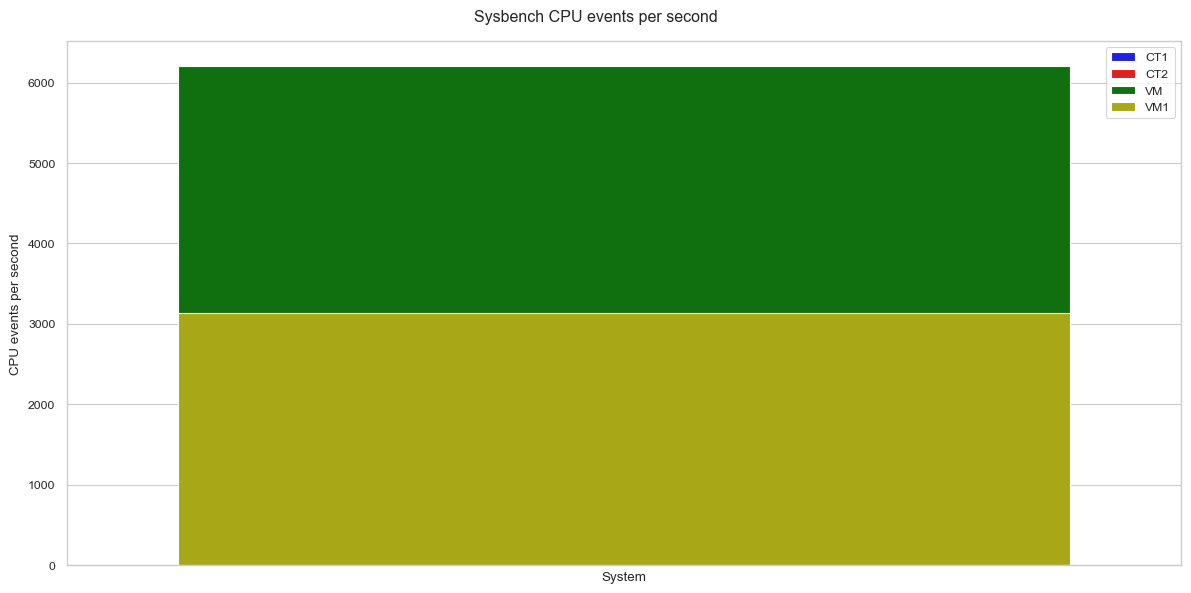

In [ ]:
CT1 = pd.read_csv('./avgs/sysbench_CT1_avg.csv')
CT2 = pd.read_csv('./avgs/sysbench_CT2_avg.csv')
VM = pd.read_csv('./avgs/sysbench_VM_M_avg.csv')
VM1 = pd.read_csv('./avgs/sysbench_VM1_avg.csv')

print(CT1.columns)

plt.figure(figsize=(12, 6))

sns.barplot(x='', y='CPU_events_per_sec', data=CT1, label='CT1', color='b')
sns.barplot(y='CPU_events_per_sec', data=CT2, label='CT2', color='r')
sns.barplot(y='CPU_events_per_sec', data=VM, label='VM', color='g')
sns.barplot(y='CPU_events_per_sec', data=VM1, label='VM1', color='y')

plt.legend()
plt.xlabel('System')
plt.ylabel('CPU events per second')
plt.xticks([])

plt.suptitle('Sysbench CPU events per second')

plt.tight_layout()
plt.show()
